# K means algorithm   - Unsupervised learning
## Problem statement: Malls customer dataset (Target Marketting)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

# Step 1 

## read the dataset 

In [2]:
import pandas as pd
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Input 
### Select the 2 important columns (which has the greater influence over the clustering for type of customers)

In [4]:
x = dataset.iloc[:, [3,4]].values
print(x[:10] , type(x))

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] <class 'numpy.ndarray'>


## Finding the No of clusters  - using elbow method

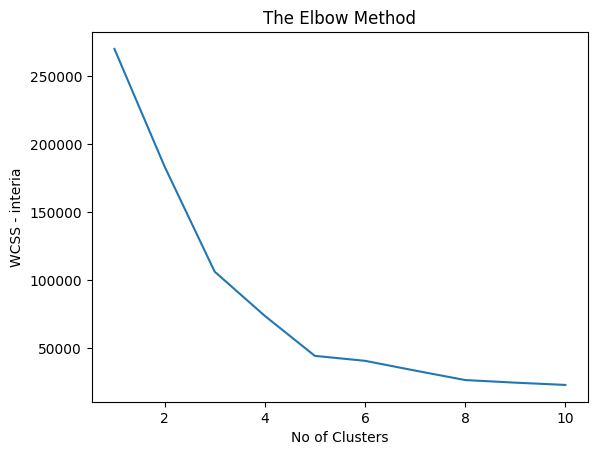

' No of Clusters = 5 (Analyzed from the graph ) '

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

list_Kmeaninteria = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(x) #model creation
    list_Kmeaninteria.append(Kmeans.inertia_)   #Sum of squared distances of samples to their closest cluster center
plt.plot(range(1,11), list_Kmeaninteria)   # (no.of clusters, interia)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS - interia")
plt.show()

""" No of Clusters = 5 (Analyzed from the graph ) """

In [10]:
## the k means model interia points (which is plotted in the graph)
list_Kmeaninteria

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

## Model Creation 

In [14]:
from sklearn.cluster import KMeans
Kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_mean_predicted = Kmeans_model.fit_predict(x)       # model creation + cluster prediction
y_mean_predicted

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [12]:
# to list the methods and attributes of any algorithm - use dir() function
dir(Kmeans_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_ht

## Create the new dataset by adding  the cluster group (type of customer category)

In [15]:
supervised = dataset 
supervised["cluster_group"] = y_mean_predicted
supervised  # new dataset 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


## save the dataset in csv file 

In [22]:
supervised.to_csv("kmeans_cluster.csv",index=False)

# Step 2

## to view the centroids (coordinate values)

In [17]:
Kmeans_model.cluster_centers_   # 5 cluster coordinates

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

## to analyze the behaviour of cluster group (type of customers) -- using Seaborn [visualization techinique]

In [18]:
supervised.columns    # list of cols in new dataset 'supervised'

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster_group'],
      dtype='object')

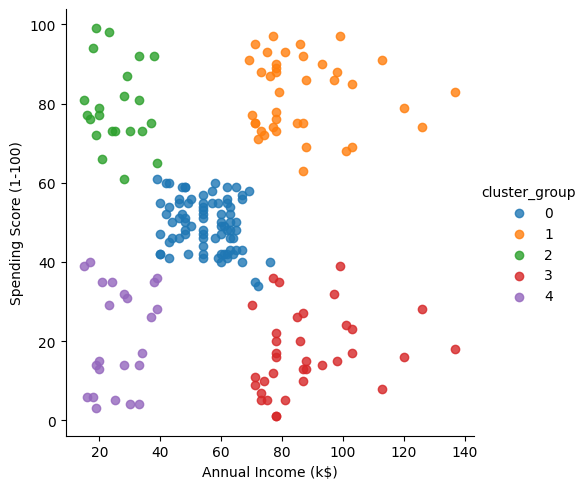

In [19]:
import seaborn as sns 
cluster_visual = sns.lmplot(data=supervised , x=supervised.columns[3] ,y=supervised.columns[4] , hue= supervised.columns[5],
                            fit_reg=False, legend=True)
# lmplot(dataset, x, y, fit_reg, legend)

In [21]:

# ANALYSEZ FROM THE ABOVE GRAPH
"""
cluster group category    |    salary     |   spending    |   Saving     |   result 
            0                 $ 40-80          40-60%           40-60%        right customers to target  
            1                 $ 70-140         20-40%           60-80%        right customers to target 
            2                 $ 20-45          20-40%           60-80%        right customers to target 
            3                 $ 20-50          60-100%           0%           customers with less savings
            4                 $ 70-140         60-100%           0%           customers with less savings
            
"""

'\ncluster group category    |    salary     |   spending    |   Saving     |   result \n            0                 $ 40-80          40-60%           40-60%        right customers to target  \n            1                 $ 70-140         20-40%           60-80%        right customers to target \n            2                 $ 20-45          20-40%           60-80%        right customers to target \n            3                 $ 20-50          60-100%           0%           customers with less savings\n            4                 $ 70-140         60-100%           0%           customers with less savings\n\n'